In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [5]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

In [9]:
y_test.shape

(10000, 1)

In [10]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [11]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [12]:
y_test = y_test.reshape(-1,)

In [13]:
classes = [ 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [14]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

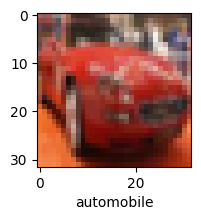

In [15]:
plot_sample(X_train, y_train, 5)

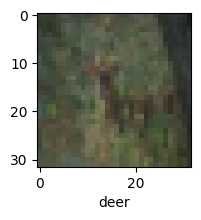

In [16]:
plot_sample(X_train, y_train, 10)

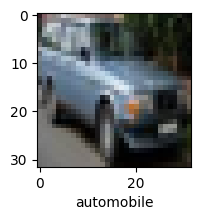

In [18]:
plot_sample(X_train, y_train, 201)

In [19]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [20]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 91ms/step - accuracy: 0.3032 - loss: 1.9316
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 126s 80ms/step - accuracy: 0.4211 - loss: 1.6423
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 121s 77ms/step - accuracy: 0.4489 - loss: 1.5587
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 125s 80ms/step - accuracy: 0.4720 - loss: 1.4934
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 145s 82ms/step - accuracy: 0.4947 - loss: 1.4335


In [21]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('Classification report: \n', classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step
Classification report: 
               precision    recall  f1-score   support

           0       0.68      0.40      0.51      1000
           1       0.55      0.67      0.60      1000
           2       0.32      0.43      0.37      1000
           3       0.35      0.44      0.39      1000
           4       0.38      0.48      0.42      1000
           5       0.58      0.16      0.26      1000
           6       0.52      0.53      0.52      1000
           7       0.67      0.38      0.49      1000
           8       0.46      0.77      0.57      1000
           9       0.57      0.44      0.50      1000

    accuracy                           0.47     10000
   macro avg       0.51      0.47      0.46     10000
weighted avg       0.51      0.47      0.46     10000



In [22]:
import seaborn as sns

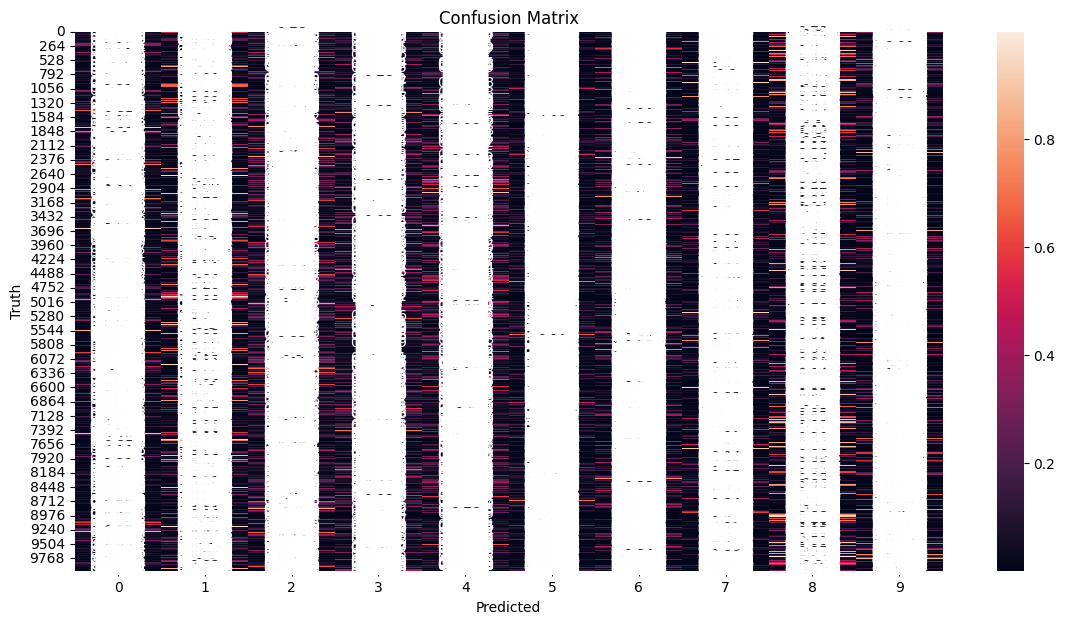

In [23]:
plt.figure(figsize=(14,7))
sns.heatmap(y_pred, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()


In [24]:
cnn = models.Sequential([
        layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),

        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [26]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.4049 - loss: 1.6592
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.6083 - loss: 1.1123
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 39ms/step - accuracy: 0.6629 - loss: 0.9701
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.7003 - loss: 0.8687
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.7257 - loss: 0.7943
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 38ms/step - accuracy: 0.7428 - loss: 0.7347
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 39ms/step - accuracy: 0.7672 - loss: 0.6731
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.7824 - loss: 0.6286
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.7982 - loss: 0.5837
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.8076 - loss: 0.5446


In [27]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6872 - loss: 0.9768


[0.9842188358306885, 0.6834999918937683]

In [28]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


array([[1.9767759e-02, 2.6169102e-04, 1.9352103e-03, 9.3841219e-01,
        3.4574259e-04, 2.3264043e-02, 6.9369795e-04, 3.3309744e-03,
        1.1929708e-02, 5.9025613e-05],
       [5.9346785e-04, 3.3446174e-02, 1.1760759e-06, 2.7093774e-08,
        1.4980652e-06, 6.8544276e-10, 8.4160506e-10, 1.6204179e-09,
        9.6542120e-01, 5.3645222e-04],
       [4.4344954e-02, 1.0750945e-01, 4.9344875e-04, 1.5637994e-02,
        9.9756951e-03, 8.6413906e-04, 8.5751648e-04, 1.9496643e-03,
        7.9476351e-01, 2.3603519e-02],
       [6.5341812e-01, 6.7969197e-03, 3.0705924e-05, 7.4774493e-04,
        8.6595782e-04, 6.1511191e-06, 1.8374010e-05, 7.9064912e-06,
        3.3784604e-01, 2.6207857e-04],
       [5.9393191e-08, 3.1205846e-07, 7.0032099e-04, 1.8714258e-02,
        2.5854761e-02, 2.6084852e-05, 9.5470321e-01, 1.9906118e-07,
        3.6280699e-07, 5.3435781e-07]], dtype=float32)

In [29]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(6)]

In [30]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

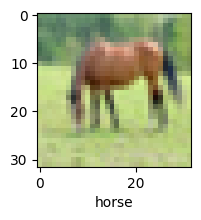

In [36]:
plot_sample(X_test, y_test, 60)

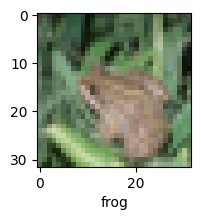

In [34]:
plot_sample(X_test, y_test, 4)

In [37]:
classes[y_classes[60]]

'horse'